# Detection of CyberSecurity Threats using Machine Learning

Submitted by:

Harshika Srivastava [016019120]

Teja Sree Goli [016040986]

Rutik Sanjay Sangle [016007589]


This notebook demonstrates the application of machine learning for detecting cyber security threats. This code script creates a system for identifying infrequent occurences which can be used in cyber security and fraud detection to identify the malicious events.

We have used machine learning model to learn on the network events and further to predict the benign or attack events based on the learnings from training data.


# Introduction

With the increasing number of systems connecting to the internet, safeguarding networks against various cyber threats has become more critical than ever. The cybersecurity landscape is evolving rapidly, prompting companies to invest millions in advanced technologies to protect their businesses and fortify defenses against potential attacks. To address these challenges, leveraging Artificial Intelligence (AI) and Machine Learning (ML) technology is crucial for automating the detection and response to cyber threats. This project aims to develop a machine-learning model for a network intrusion detection system. The primary goal is to provide a binary classification of results by identifying whether the input network log is an attack or benign. Organizations can benefit from these technologies by automating the detection of outlier patterns in networks and flagging systems that do not comply with organizational standards. This proactive approach enhances the overall cybersecurity posture and helps prevent potential threats before they can cause harm.

# Implementation Overview




**1. Collection of Logs:** The process initiates with the collection of logs. The dataset utilized for this project encompasses two types of network traffic: benign and malicious.

**2. Cleaning and Preparing Data:** After collecting the initial log data, the next step is to clean and prepare it. This means going through the data to get rid of any irrelevant features, dealing with missing or incomplete data, and changing the log entries into a format that can be easily used for machine learning.

**3. Feature Selection:** After cleaning the data, an analysis of features is conducted to determine their suitability for integration into the machine learning model.

**4. Model Training and Prediction:** Utilizing the chosen features, the model undergoes training using a dataset with known outcomes. Subsequently, the trained model is capable of making predictions or decisions concerning new, unseen data, thereby assessing whether a new log entry is benign or malicious.

**5. Fine-Tune Model Performance:** Following the model training, the performance of the model is fine-tuned. This process may include adjusting the model's parameters, incorporating additional training data, or applying techniques such as cross-validation to enhance its accuracy.

**6. Calculate Model Accuracy:** The model's accuracy is determined to assess its performance. This generally involves comparing the model's predictions to a dataset with known outcomes and calculating the percentage of accurate predictions.

**7. Determine if connection log is an attack:** As new log data comes in, the model determines if a connection log is an attack based on what it has learned.

**8. Store the results:** The model's predictions, indicating whether a log is benign or malicious, are stored. These results can be utilized to create embeddings, which are vector representations of the logs. This process helps in visualizing and comprehending the connections within the data.

# Note:  
This notebook is divided into two parts.

Part-1 Training a model for prediction of threats

Part-2 Finding relevant features for cybersecutity research

# Dataset description

For this experimentation, We have taken Dataset from Canadian institute of cybersecurity- https://www.unb.ca/cic/datasets/ids-2018.html This dataset has 1048575 rows × 80 columns.

# Installing Dependencies

In [ ]:
!pip3 install tensorflow keras pandas --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.1/997.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 24.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pa

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import pandas as pd
import tensorflow.keras.backend as K
from tensorflow import keras
from tensorflow.keras.models import Model

In [ ]:
import contextlib
import gc

@contextlib.contextmanager
def clear_memory():
    try:
        yield
    finally:
        gc.collect()

We'll will use data cleaning script from [research work](https://github.com/Colorado-Mesa-University-Cybersecurity/DeepLearning-IDS). We will use this code for cleaning the data.


In [ ]:
!git clone -q https://github.com/Colorado-Mesa-University-Cybersecurity/DeepLearning-IDS.git

# Data downloading

Now, we will download the data that is coming from link- https://www.unb.ca/cic/datasets/ids-2018.html

Currently, we are using dataset for span of two days. We will download it and store it in csv files

In [ ]:
!wget "https://cse-cic-ids2018.s3.ca-central-1.amazonaws.com/Processed%20Traffic%20Data%20for%20ML%20Algorithms/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv" -q --show-progress
!wget "https://cse-cic-ids2018.s3.ca-central-1.amazonaws.com/Processed%20Traffic%20Data%20for%20ML%20Algorithms/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv" -q --show-progress

Thursday-22-02-2018 100%[===================>] 364.91M  27.7MB/s    in 14s     
Friday-23-02-2018_T 100%[===================>] 365.10M  50.0MB/s    in 8.0s    


In [ ]:
with clear_memory():
    data = pd.read_csv('Friday-23-02-2018_TrafficForML_CICFlowMeter.csv')

data.Label.value_counts()

Label
Benign              1048009
Brute Force -Web        362
Brute Force -XSS        151
SQL Injection            53
Name: count, dtype: int64

In [ ]:
# df_filtered= data[:10000]
# df_filtered.to_csv('df_filtered_10K.csv')

In [ ]:
data

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,6,23/02/2018 08:18:29,1532698,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
1,500,17,23/02/2018 08:17:45,117573855,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786927.5,2.375324e+07,75583006,41990849,Benign
2,500,17,23/02/2018 08:17:45,117573848,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786924.0,2.375325e+07,75583007,41990841,Benign
3,22,6,23/02/2018 08:19:55,1745392,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
4,500,17,23/02/2018 08:18:17,89483474,6,0,3000,0,500,500,...,8,4000364.0,0.0,4000364,4000364,21370777.5,1.528092e+07,41989576,7200485,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,54116,6,23/02/2018 09:00:54,85992425,2,0,0,0,0,0,...,20,0.0,0.0,0,0,85992425.0,0.000000e+00,85992425,85992425,Benign
1048571,33914,6,23/02/2018 12:31:42,132,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
1048572,53,17,23/02/2018 12:15:24,79134,1,1,41,98,41,41,...,8,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
1048573,3389,6,23/02/2018 12:45:39,10053785,11,12,1321,1659,677,0,...,20,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign


In [ ]:
# data.info()

# Clean Data

We'll run a cleanup script from the previously downloaded GitHub repo.

The provided Python script comprises two main functions: cleanData(inFile, outFile) and cleanAllData(). The former processes a CSV file containing traffic data by filtering rows based on specific conditions such as starting with 'D', containing 'Infinity' or 'infinity', and converting date formats to epoch time. It generates cleaned data files segregated by conditions or labels found within the input data. The latter function sets paths for input and output directories, iterates through files in the input directory, and calls cleanData() for each file, thus cleaning and organizing the data into corresponding output files. Additionally, the script includes a section under if __name__ == "__main__": that checks command-line arguments; if none are provided or if the argument is not 'all', it displays usage instructions. If 'all' is specified, it executes the cleanAllData() function to clean all files within the input directory; otherwise, it processes a single file based on the provided input and output paths. Overall, the script is designed to clean and categorize traffic data from CSV files into separate cleaned files based on specific conditions or labels present in the input data.

In [ ]:
!python DeepLearning-IDS/data_cleanup.py "Friday-23-02-2018_TrafficForML_CICFlowMeter.csv" "result23022018"

cleaning Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
total rows read = 1048576
all done writing 1042868 rows; dropped 5708 rows


We'll now review the cleaned data from the previous step.

In [ ]:
with clear_memory():
    data_23_cleaned = pd.read_csv('result23022018.csv')

data_23_cleaned.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,6,1.519374e+09,1532698,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
1,500,17,1.519374e+09,117573855,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786927.5,2.375324e+07,75583006,41990849,Benign
2,500,17,1.519374e+09,117573848,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786924.0,2.375325e+07,75583007,41990841,Benign
3,22,6,1.519374e+09,1745392,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
4,500,17,1.519374e+09,89483474,6,0,3000,0,500,500,...,8,4000364.0,0.0,4000364,4000364,21370777.5,1.528092e+07,41989576,7200485,Benign


In [ ]:
data_23_cleaned.Label.value_counts()

Label
Benign              1042301
Brute Force -Web        362
Brute Force -XSS        151
SQL Injection            53
Name: count, dtype: int64

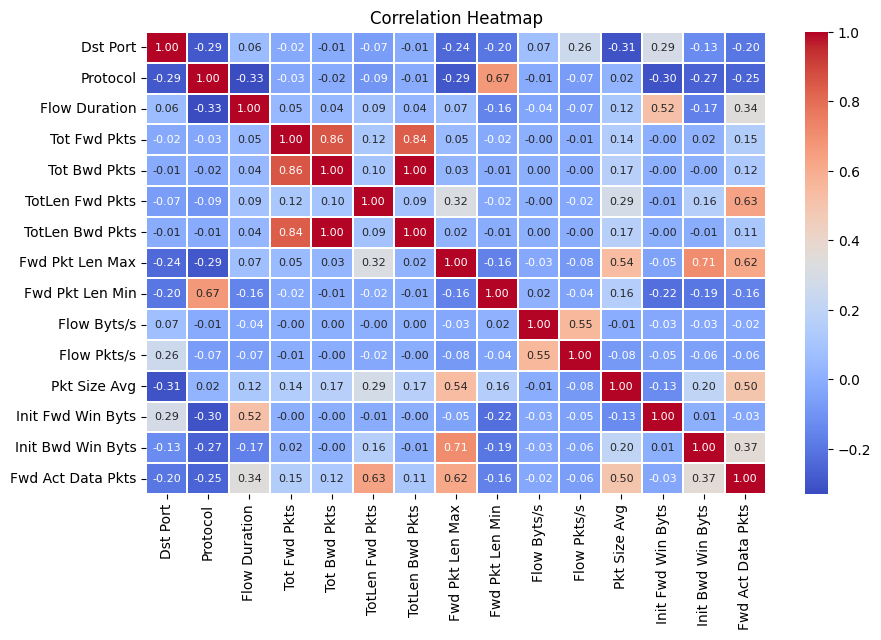

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_without_last_col = data[['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max',
                          'Fwd Pkt Len Min','Flow Byts/s', 'Flow Pkts/s','Pkt Size Avg', 'Init Fwd Win Byts',
                           'Init Bwd Win Byts', 'Fwd Act Data Pkts']]

numeric_columns = df_without_last_col.select_dtypes(include='number').columns

df_numeric = df_without_last_col[numeric_columns]

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 6))  # Increase figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8},linewidths=0.1)  # Adjust font size
plt.title('Correlation Heatmap')
plt.show()

This is a correlation heatmap, which is a graphical representation of the correlation matrix showing the correlation coefficients between variables. Each cell in the grid shows the correlation between two variables. The color scale, which goes from blue to red, indicates the strength and direction of the correlation: blue for negative correlation, red for positive correlation, and white for no correlation.

A few observations from the correlation heatmap of the features are as below:
1.	The most correlated features are the count of forward packets and backward packets. This correlation arises from the common characteristic of legitimate network traffic, which typically exhibits an equal number of forward and backward packets. Conversely, malicious traffic often displays an imbalance between the number of forward and backward packets.
2.	Another closely correlated feature is the flow duration. Legitimate network flows usually have a short duration, whereas malicious flows tend to be more prolonged.
3.	The total length of forward packets and backward packets exhibits a high correlation, given that the combined length of packets is generally proportional to the flow duration.
4.	There is a negative correlation between the flow bytes per second feature and the packet size average feature. This is attributed to the fact that larger packets typically result in a lower flow bytes per second rate compared to smaller packets.

# Machine learning Model

In this section, we will load our trained model. this model has been trained on 1M data as collected from above steps.

Our model has capability to predict whether the given event is attack or benign based on the input features provided during training. Our model is able to classify three categories-

1. Benign as Ben
2. BruteForce-Web or BruteForce-XSS as Bru
3. SQL-Injection as SQL





# Model Description


### Model Type:
Sequential - This type of model is a linear stack of layers where each layer has exactly one input tensor and one output tensor.

### Layers:
**Dense (128 units):** The first layer is a fully connected (dense) layer with 128 neurons. It takes an input of unspecified size (as denoted by None), which should match the number of features in your dataset. The layer has a weight parameter for each connection, resulting in 10,240 parameters (this suggests that the input size is 80, since 80 * 128 + 128 (bias terms) = 10240).


**Dense (64 units):** The second layer is also a dense layer, now with 64 neurons. It takes inputs from the previous layer's 128 neurons, leading to 8,256 parameters (computed as 128 * 64 + 64 = 8256).


**Dense (1 unit):** The final layer is a dense layer with a single neuron, which outputs the model's prediction. This could be a binary classification (attack vs. benign), and thus it has 65 parameters (64 * 1 + 1 = 65).


###	Output Shape:
The output shape of each layer indicates the dimensionality of the output space.
###	Parameters:
1.	Total parameters: 18,561 - The total number of trainable parameters in the model.
2.	Trainable parameters: All 18,561 parameters are trainable, meaning they will be updated during training.
3.	Non-trainable params: There are no non-trainable parameters in this model.


# Model Training

We have trained our model in computer engineering lab on 1M rows of data, as we do not have computation resources, we have uploaded the trained model on drive. Now, we are downloading the model from their and using it for prediction.

In [ ]:
!wget -q -O it_threat_model.zip "https://drive.google.com/uc?export=download&id=1mAOX0ySD3qZ6ncycZYFgb39Lfb7WfGZm"
!unzip -q it_threat_model.zip

In [ ]:
with clear_memory():
    model = keras.models.load_model('it_threat_model')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               10240     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 18561 (72.50 KB)
Trainable params: 18561 (72.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
with clear_memory():
    # Use the first layer
    layer_name = 'dense'
    intermediate_layer_model = Model(
        inputs = model.input,
        outputs = model.get_layer(layer_name).output
    )

# Model prediction
In this section, we are using model to predict and storing the results in another dataframe

In [ ]:
from tqdm import tqdm
items_to_upload = []

with clear_memory():
    model_res = intermediate_layer_model.predict(K.constant(data_23_cleaned.iloc[:,:-1]))

    for i, res in tqdm(zip(data_23_cleaned.iterrows(), model_res), total = len(model_res)):
        benign_or_attack = i[1]['Label'][:3]
        items_to_upload.append((benign_or_attack + '_' + str(i[0]), res.tolist()))

32590/32590 [==============================] - 56s 2ms/step


100%|██████████| 1042867/1042867 [01:45<00:00, 9906.79it/s] 


In [ ]:
model_res

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 7.795242e+08,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 7.795243e+08,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

We'll store the data in a Pandas DataFrame.

In [ ]:
with clear_memory():
    df = pd.DataFrame(items_to_upload, columns=['ID', 'Model_Results'])

df.tail(50)

,ID,Model_Results
1042817,SQL_1042817,"[0.0, 0.0, 0.0, 126023272.0, 0.0, 0.0, 5348917..."
1042818,SQL_1042818,"[0.0, 0.0, 0.0, 151364432.0, 0.0, 0.0, 7586056..."
1042819,SQL_1042819,"[0.0, 0.0, 0.0, 126001520.0, 0.0, 0.0, 5348170..."
1042820,SQL_1042820,"[0.0, 0.0, 0.0, 154179840.0, 0.0, 0.0, 7249012..."
1042821,SQL_1042821,"[0.0, 0.0, 0.0, 112947976.0, 0.0, 0.0, 6760301..."
1042822,SQL_1042822,"[0.0, 0.0, 0.0, 152903872.0, 0.0, 0.0, 8204933..."
1042823,SQL_1042823,"[0.0, 0.0, 0.0, 126937208.0, 0.0, 0.0, 5380385..."
1042824,SQL_1042824,"[0.0, 0.0, 0.0, 152676336.0, 0.0, 0.0, 8026027..."
1042825,SQL_1042825,"[0.0, 0.0, 0.0, 126407360.0, 0.0, 0.0, 5362128..."
1042826,SQL_1042826,"[0.0, 0.0, 0.0, 152898016.0, 0.0, 0.0, 8208604..."


In [ ]:
df[['Label', 'Id']] = df['ID'].str.split('_', expand=True)
df

,ID,Model_Results,Label,Id
0,Ben_0,"[0.0, 0.0, 0.0, 125628656.0, 0.0, 0.0, 5421442...",Ben,0
1,Ben_1,"[0.0, 0.0, 0.0, 356751744.0, 1190461440.0, 0.0...",Ben,1
2,Ben_2,"[0.0, 0.0, 0.0, 356751680.0, 1190461440.0, 0.0...",Ben,2
3,Ben_3,"[0.0, 0.0, 0.0, 125515856.0, 0.0, 0.0, 5432884...",Ben,3
4,Ben_4,"[0.0, 0.0, 0.0, 26214912.0, 698683840.0, 0.0, ...",Ben,4
...,...,...,...,...
1042862,SQL_1042862,"[0.0, 0.0, 0.0, 126063056.0, 0.0, 0.0, 5350284...",SQL,1042862
1042863,SQL_1042863,"[0.0, 0.0, 0.0, 125825792.0, 0.0, 0.0, 5341860...",SQL,1042863
1042864,SQL_1042864,"[0.0, 0.0, 0.0, 125809568.0, 0.0, 0.0, 5341393...",SQL,1042864
1042865,SQL_1042865,"[0.0, 0.0, 0.0, 125813080.0, 0.0, 0.0, 5341456...",SQL,1042865


In [ ]:
data_23_cleaned

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,6,1.519374e+09,1532698,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
1,500,17,1.519374e+09,117573855,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786927.5,2.375324e+07,75583006,41990849,Benign
2,500,17,1.519374e+09,117573848,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786924.0,2.375325e+07,75583007,41990841,Benign
3,22,6,1.519374e+09,1745392,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
4,500,17,1.519374e+09,89483474,6,0,3000,0,500,500,...,8,4000364.0,0.0,4000364,4000364,21370777.5,1.528092e+07,41989576,7200485,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042862,80,6,1.519356e+09,46,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000e+00,0,0,SQL Injection
1042863,80,6,1.519383e+09,277,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000e+00,0,0,SQL Injection
1042864,80,6,1.519381e+09,331,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000e+00,0,0,SQL Injection
1042865,80,6,1.519355e+09,313,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000e+00,0,0,SQL Injection


# Part-2 Finding relevant features

Finding relevant features and performing analysis is done on notebook-2
link - https://colab.research.google.com/drive/1JO_5Wk16DfOJfTfk2MgCtAsbuuMu263R?usp=sharing



## Feature Engineering
We analyzed a dataset representing various network traffic types. The key features examined include:
•	Flow Duration: Indicative of the time span of network flow.

•	Total Forward and Backward Packets: Reflects the count of data packets sent in both directions.

•	Total Length of Forward and Backward Packets: Provides insights into the data volume.

•	TCP Flag Counts: Includes flags like PSH, SYN, ACK, which are crucial for understanding TCP connection states.


# Conclusion

The project successfully demonstrated how machine learning can be used to identify vulnerabilities in networks. The classifier's ability to distinguish between benign and malicious signals was noteworthy. Certain attack types could be identified quite well using features like Flow Duration and Total Forward Packets. One important predictor of benign traffic was found to be the TCP Flag Counts, particularly the PSH flag. These results highlight the potential of machine learning to improve intrusion detection systems on networks. In conclusion, it should be noted that the suggested machine learning model showed encouraging results and future work may concentrate on improving the model's performance and adaptability to changing cyber threats.

# Future Work

Due to the growing sophistication of cyber threats, network security is becoming increasingly important. Using machine learning to detect network intrusions has shown to be quite successful, providing organizations all over the world with a potential defensive strategy. We have shown how machine learning may be used in real-world applications to improve network intrusion detection systems in our project. In particular, we built our model using a large dataset which brings assessment and performance factors for system fitting into consideration.
In addition, to mitigate the difficulties associated with practical application, we support the integration of advanced machine learning techniques, particularly in the context of cybersecurity. Combining cloud computing resources with deep learning approaches seems to be a potent way to optimize our model's performance when it is implemented in operational networks. This integration highlights the critical role that machine learning plays in strengthening cybersecurity measures while also minimizing worries about dataset-driven performance difficulties.  This method simplifies existing network security strategies and provides a strong basis for emerging research projects that aim to increase cybersecurity resilience against evolving attacks.


# References

1. https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00475-1
2. https://ieeexplore.ieee.org/document/9292388
3. https://owasp.org/www-community/attacks
4. https://isyou.info/jisis/vol9/no4/jisis-2019-vol9-no4-01.pdf
5. https://www.unb.ca/cic/datasets/ids-2018.html
6. https://github.com/Colorado-Mesa-University-Cybersecurity/DeepLearning-IDS
